Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Multiple linear regression: Problem solving

In this session, you'll apply multiple linear regression to a new dataset, `ToothGrowth`, which has the following variables:

| Variable | Type    | Description                |
|----------|---------|:----------------------------|
| len      | Ratio   | Tooth length               |
| supp     | Nominal | Supplement type (VC or OJ) |
| dose     | Ratio   | Dose in milligrams/day     |

These data were collected in an experiment measuring the effect of vitamin C supplements (`supp`; either orange juice, `OJ` or ascorbic acid, `VC`) on tooth length (`len`) at three different doses (`dose`; 0.5, 1, and 2 mg/day) in guinea pigs.

Our outcome variable that we'd like to predict is `len`

**QUESTION:**

What relationship to you expect between `dose` and `len`?

**ANSWER: (click here to edit)**


<hr>

**QUESTION:**

What relationship do you expect between `supp` and `len`?

**ANSWER: (click here to edit)**


<hr>

## Load data

Start with importing `pandas`.

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="importAs" id="ji{aK+A5l`eBa?Q1/|Pf" x="128" y="319"><field name="libraryName">pandas</field><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field></block></xml>

Load a dataframe with `"datasets/toothgrowth.csv"` and display it.

In [2]:
dataframe = pd.read_csv('datasets/toothgrowth.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="variables_set" id="9aUm-oG6/!Z54ivA^qkm" x="36" y="169"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="g.yE$oK%3]$!k91|6U|I"><mutation items="1"></mutation><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="fBBU[Z}QCipaz#y=F$!p"><field name="TEXT">datasets/toothgrowth.csv</field></block></value></block></value></block><block type="variables_get" id=".kIRsPV4CnEtZh=5+Y3:" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


Before converting `supp` into a dummy variable, save it to a variable so you can put it back into the dataframe later.

In [3]:
supp = dataframe[['supp']]

supp

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="ZuppZy%mevG;P-:nHc5$">supp</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="variables_set" id="n?M6{W!2xggQx@X7_00@" x="0" y="391"><field name="VAR" id="ZuppZy%mevG;P-:nHc5$">supp</field><value name="VALUE"><block type="indexer" id="3_O9X7-U(%IcMj/dcLIo"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="?V*^3XN6]-U+o1C:Vzq$"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="^a?w!r[mo5(HVwiC0q=4"><field name="TEXT">supp</field></block></value></block></value></block></value></block><block type="variables_get" id="Lvbr[Vv2??Mx*R}-s{,0" x="8" y="470"><field name="VAR" id="ZuppZy%mevG;P-:nHc5$">supp</field></block></xml>

,supp
0,VC
1,VC
2,VC
3,VC
4,VC
5,VC
6,VC
7,VC
8,VC
9,VC


Now convert the nominal variables in the dataframe to dummies and save the result.

In [4]:
dataframe = pd.get_dummies(dataframe,drop_first=True,dtype=int)

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="variables_set" id="f~Vi_+$-EAjHP]f_eV;K" x="-12" y="118"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="|n$+[JUtgfsvt4?c:yr_"><mutation items="3"></mutation><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="ADD0"><block type="variables_get" id="Bbsj2h*vF?=ou`pb%n59"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="bMU2}K@krqBgj]d/*N%r"><field name="CODE">drop_first=True</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="xtn#Tu}^y3gD*?FYaVN`"><field name="CODE">dtype=int</field></block></value></block></value></block><block type="variables_get" id="O}n(u8[Tmbxs{7+=n#[$" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,dose,supp_VC
0,4.2,0.5,1
1,11.5,0.5,1
2,7.3,0.5,1
3,5.8,0.5,1
4,6.4,0.5,1
5,10.0,0.5,1
6,11.2,0.5,1
7,11.2,0.5,1
8,5.2,0.5,1
9,7.0,0.5,1


**QUESTION:**

Which supplement is base level (or reference level) after coverting `supp` to dummies?

**ANSWER: (click here to edit)**

*OJ is the reference level. We can tell because OJ is now coded as 0 and VC is coded as 1*

<hr>

Next put the `supp` variable you saved back into the dataframe.

In [5]:
dataframe = dataframe.assign(supp=supp)

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="variables_set" id="asM(PJ)BfN(o4N+9wUt$" x="42" y="181"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id=";29VMd-(]?GAtxBc4RYY"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="0yKT_^W!N#JL!5%=T_+J"><field name="CODE">supp=supp</field></block></value></block></value></block><block type="variables_get" id="lDK;Z$W(7oNiK4C.*1|4" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,dose,supp_VC,supp
0,4.2,0.5,1,VC
1,11.5,0.5,1,VC
2,7.3,0.5,1,VC
3,5.8,0.5,1,VC
4,6.4,0.5,1,VC
5,10.0,0.5,1,VC
6,11.2,0.5,1,VC
7,11.2,0.5,1,VC
8,5.2,0.5,1,VC
9,7.0,0.5,1,VC


## Explore data

### Descriptive statistics

Display the overall descriptive statistics.

In [6]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="?LJ($9e@x-B.Y,`==|to" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,len,dose,supp_VC
count,60.000000,60.000000,60.000000
mean,18.813333,1.166667,0.500000
std,7.649315,0.628872,0.504219
min,4.200000,0.500000,0.000000
25%,13.075000,0.500000,0.000000
50%,19.250000,1.000000,0.500000
75%,25.275000,2.000000,1.000000
max,33.900000,2.000000,1.000000


**QUESTION:**

If the mean of `supp_VC` is .50, what does that tell you?

**ANSWER: (click here to edit)**

*Exactly half of the guinea pigs got OJ and half got ascorbic acid.*

<hr>

Group the dataframe by `supp`.

In [7]:
groups = dataframe.groupby('supp')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="0zfUO$}u$G4I(G1e~N#r">groups</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="variables_set" id="kr80`.2l6nJi|eO*fce[" x="7" y="29"><field name="VAR" id="0zfUO$}u$G4I(G1e~N#r">groups</field><value name="VALUE"><block type="varDoMethod" id="x-nB@sYwAL|7o-0;9DUU"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">groupby</field><data>dataframe:groupby</data><value name="ADD0"><block type="text" id="Lby0o8dWqy8ta:56K|bn"><field name="TEXT">supp</field></block></value></block></value></block></xml>

Display descriptive statistics for the groups.

In [8]:
groups.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="0zfUO$}u$G4I(G1e~N#r">groups</variable></variables><block type="varDoMethod" id="]q4DcYnB3HUf/GehIu+T" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="0zfUO$}u$G4I(G1e~N#r">groups</field><field name="MEMBER">describe</field><data>groups:describe</data></block></xml>

len                                                        dose  \
     count       mean       std  min     25%   50%     75%   max count   
supp                                                                     
OJ    30.0  20.663333  6.605561  8.2  15.525  22.7  25.725  30.9  30.0   
VC    30.0  16.963333  8.266029  4.2  11.200  16.5  23.100  33.9  30.0   

                ...           supp_VC                                     
          mean  ...  75%  max   count mean  std  min  25%  50%  75%  max  
supp            ...                                                       
OJ    1.166667  ...  2.0  2.0    30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
VC    1.166667  ...  2.0  2.0    30.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 24 columns]

**QUESTION:**

Which `supp` had a higher mean `len`?

**ANSWER: (click here to edit)**

OJ

<hr>

**QUESTION:**

Why is the mean `dose` the same for OJ and VC?

**ANSWER: (click here to edit)**

*Because each `supp` got the same doses on average*

<hr>

### Plots

Import `plotly.express`.

In [9]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable></variables><block type="importAs" id="kPF|afHe60B:rsCmJI2O" x="128" y="178"><field name="libraryName">plotly.express</field><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field></block></xml>

Create a **boxplot** (`with px do box`) with `dose` as X, `len` as Y, and color as `supp`

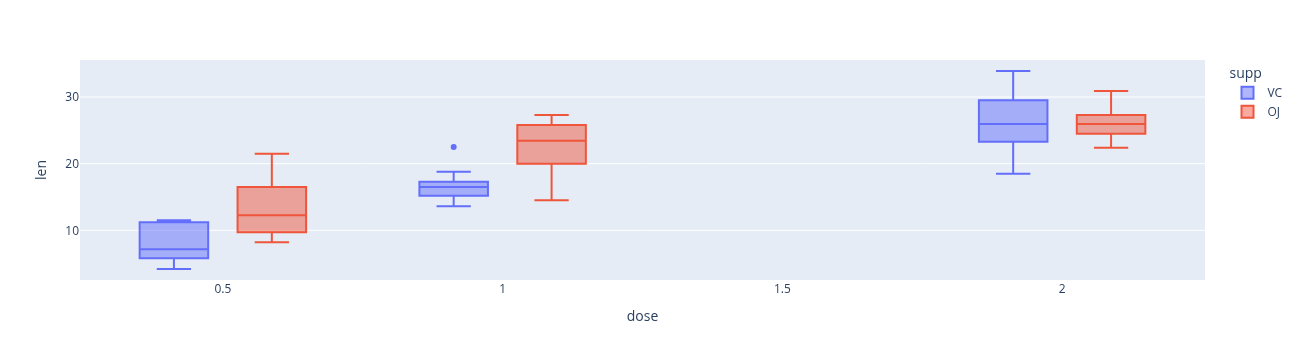

In [10]:
px.box(dataframe,x="dose",y="len",color="supp")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="38" y="59"><mutation items="4"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">box</field><data>px:box</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="dose"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="len"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="aCZ,k0LzStF1D(+SB2%A"><field name="CODE">color="supp"</field></block></value></block></xml>

The box plot matches the descriptive statistics in a useful way:

- The line in the middle of the boxplot is the **median**
- The top/bottoms of each box are the **75th percentile** and **25th percentile**, respectively
- The "whiskers" or bars above and below the box stop at the point furthest from the median that is within 1.5 times the difference between the 75th and 25th percentiles

Boxplots are a good way at getting a feel for the distribution of data, especially when you are comparing two groups like this.

**QUESTION:**

Why didn't we use scatterplots instead? Try it and see.

**ANSWER: (click here to edit)**


*Scatterplots pile up both categories of points on top of each other in a line corresponding to dose. It's really hard to see where the center of the distribution is with scatterplots in this situation.*

<hr>

**QUESTION:**

Which `supp` has a higher median `len`? 
Is it the same across `dose`? 
What does this tell you?

**ANSWER: (click here to edit)**

*OJ is higher for the two lowest doses but is the same as VC for the highest dose.
Since `supp` seems to change depending on `dose`, we likely have an interaction between `supp` and `dose`.*

<hr>

## Modeling

### Model 1

Start with a model that predicts `len` based on `dose`.

Import `sklearn.linear_model` and `numpy`.

In [11]:
import sklearn.linear_model as linear_model
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable><variable id="YynR+H75hTgW`vKfMxOx">np</variable></variables><block type="importAs" id="m;0Uju49an!8G3YKn4cP" x="93" y="288"><field name="libraryName">sklearn.linear_model</field><field name="VAR" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><next><block type="importAs" id="^iL#`T{6G3.Uxfj*r`Cv"><field name="libraryName">numpy</field><field name="VAR" id="YynR+H75hTgW`vKfMxOx">np</field></block></next></block></xml>

Create a linear regression model.

In [12]:
lm = linear_model.LinearRegression()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable></variables><block type="variables_set" id="!H`J#y,K:4I.h#,HPeK{" x="127" y="346"><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><value name="VALUE"><block type="varCreateObject" id="h:O3ZfE(*c[Hz3sF=$Mm"><mutation items="1"></mutation><field name="VAR" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><field name="MEMBER">LinearRegression</field><data>linear_model:LinearRegression</data></block></value></block></xml>

Train the model to predict `len` based on `dose` using all the data.

In [13]:
lm.fit(dataframe[['dose']],dataframe[['len']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="35" y="137"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">fit</field><data>lm:fit</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">dose</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">len</field></block></value></block></value></block></value></block></xml>

LinearRegression()

Get the $r^2$.

In [14]:
lm.score(dataframe[['dose']],dataframe[['len']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="35" y="137"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">score</field><data>lm:score</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">dose</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">len</field></block></value></block></value></block></value></block></xml>

0.6443132738626068

**QUESTION:**

Do you think this is a good $r^2$?
Why or why not?

**ANSWER: (click here to edit)**


*The model captures 64% of the variance, which isn't bad. We might be able to do better with a little more work.*

<hr>

In [15]:
import statsmodels.api as sm
import numpy as np

In [16]:
X = sm.add_constant(dataframe['dose']) # Add a constant to the independent variable
y = dataframe['len'] # Dependent variable

In [17]:
model = sm.OLS(y, X) # OLS stands for Ordinary Least Squares
results = model.fit() # Fit the model

In [18]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     105.1
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           1.23e-14
Time:                        20:57:20   Log-Likelihood:                -175.70
No. Observations:                  60   AIC:                             355.4
Df Residuals:                      58   BIC:                             359.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4225      1.260      5.890      0.0

### Diagnostics 1

Get the predictions from the model and put them in the dataframe.

In [30]:
dataframe = dataframe.assign(predictions1= (lm.predict(dataframe[['dose']])))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="21" y="25"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="ou+aFod:USt{s9i+emN}"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="UFqs+Ox{QF6j*LkUvNvu"><field name="CODE">predictions1=</field><value name="INPUT"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="indexer" id="J1)p6y/1^;|L|guiCR%2"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="Asy|RX,d{QfgBQmjI{@@"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">dose</field></block></value></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="lzSWs1CWzS{|krE3$|,]" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,dose,supp_VC,supp,predictions1
0,4.2,0.5,True,VC,12.304286
1,11.5,0.5,True,VC,12.304286
2,7.3,0.5,True,VC,12.304286
3,5.8,0.5,True,VC,12.304286
4,6.4,0.5,True,VC,12.304286
5,10.0,0.5,True,VC,12.304286
6,11.2,0.5,True,VC,12.304286
7,11.2,0.5,True,VC,12.304286
8,5.2,0.5,True,VC,12.304286
9,7.0,0.5,True,VC,12.304286


**QUESTION:**

How many predictions did you get? Why?

**ANSWER: (click here to edit)**

*Three predictions for three doses, repeated 60 times.*
<hr>

Add the residuals to `dataframe`.

In [32]:
dataframe = dataframe.assign(residuals1= (dataframe['len'] - dataframe['predictions1']))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="-10" y="139"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="^$QWpb1hPzxWt/?~mZBX"><field name="CODE">residuals1=</field><value name="INPUT"><block type="math_arithmetic" id="=szmSC[EoihfyX_5cH6v"><field name="OP">MINUS</field><value name="A"><shadow type="math_number" id="E[2Ss)z+r1pVe~OSDMne"><field name="NUM">1</field></shadow><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">len</field></block></value></block></value><value name="B"><shadow type="math_number" id="Z%,Q(P8VED{wb;Q#^bM4"><field name="NUM">1</field></shadow><block type="indexer" id="b.`x=!iTEC%|-VGV[Hu5"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="g`tk1*Psq~biS1z%3c`q"><field name="TEXT">predictions1</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="h0wMz)I}*q%AYU/9Rp;o" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,dose,supp_VC,supp,predictions1,residuals1
0,4.2,0.5,True,VC,12.304286,-8.104286
1,11.5,0.5,True,VC,12.304286,-0.804286
2,7.3,0.5,True,VC,12.304286,-5.004286
3,5.8,0.5,True,VC,12.304286,-6.504286
4,6.4,0.5,True,VC,12.304286,-5.904286
5,10.0,0.5,True,VC,12.304286,-2.304286
6,11.2,0.5,True,VC,12.304286,-1.104286
7,11.2,0.5,True,VC,12.304286,-1.104286
8,5.2,0.5,True,VC,12.304286,-7.104286
9,7.0,0.5,True,VC,12.304286,-5.304286


**QUESTION:**

How do the residuals compare to the predictions? Why?

**ANSWER: (click here to edit)**

*The residuals are all different even though there are only three prediction values. 
This is because the residuals are also based on `len`, which is different for the 60 guinea pigs.*

<hr>

Make a figure to check linearity and equal variance **with boxplots**.

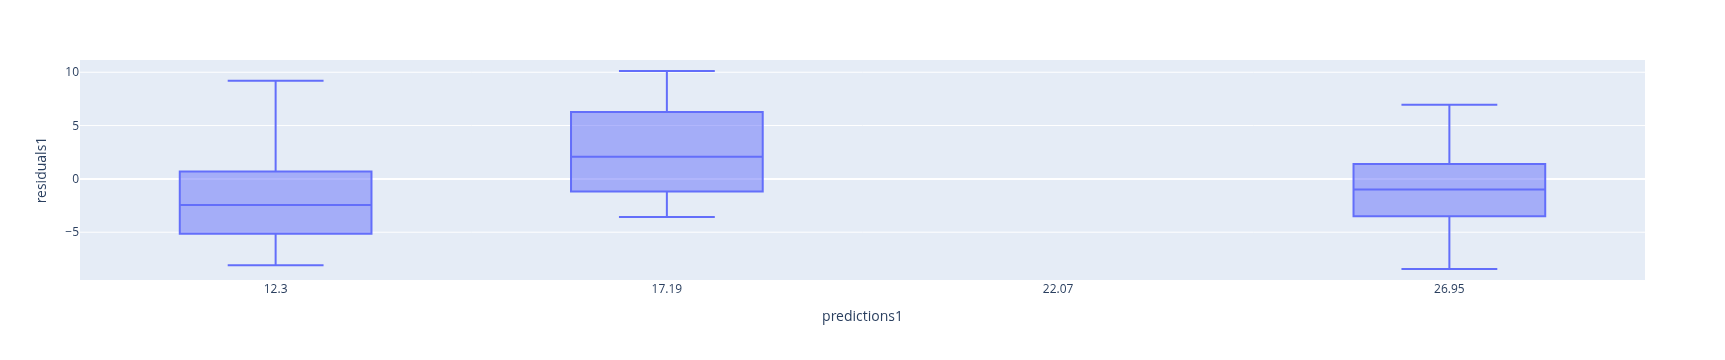

In [34]:
px.box(dataframe,x="predictions1",y="residuals1")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="35" y="53"><mutation items="3"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">box</field><data>px:box</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="predictions1"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="residuals1"</field></block></value></block></xml>

**QUESTION:**

Do we have linearity and equal variance? Why?

**ANSWER: (click here to edit)**

*We have somewhat equal variance since the boxes are about the same height and the whiskers are about the same height for all doses.
However, we don't have linearity because the the residuals are "humped" in the middle and low on the ends.*
<hr>

### Model 2

Create an interaction variable `ds` = `dose` * `supp_VC` and add it to the dataframe.

In [19]:
dataframe = dataframe.assign(ds= (dataframe['dose'] * dataframe['supp_VC']))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="17" y="142"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="^$QWpb1hPzxWt/?~mZBX"><field name="CODE">ds=</field><value name="INPUT"><block type="math_arithmetic" id="5RK=q#[GZz]1)F{}r5DR"><field name="OP">MULTIPLY</field><value name="A"><shadow type="math_number" id="HSr6hs;fnYbxDdpw8o*6"><field name="NUM">1</field></shadow><block type="indexer" id="Xh!r5Y0#k:n+aqBjuvad"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="|4#UlYaNe-aeV+s$,Wn]"><field name="TEXT">dose</field></block></value></block></value><value name="B"><shadow type="math_number" id=";S0XthTRZu#Q.w|qt88k"><field name="NUM">1</field></shadow><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">supp_VC</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="|:#)c3^OVHRz0,Iw)mSN" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,dose,supp_VC,supp,ds
0,4.2,0.5,1,VC,0.5
1,11.5,0.5,1,VC,0.5
2,7.3,0.5,1,VC,0.5
3,5.8,0.5,1,VC,0.5
4,6.4,0.5,1,VC,0.5
5,10.0,0.5,1,VC,0.5
6,11.2,0.5,1,VC,0.5
7,11.2,0.5,1,VC,0.5
8,5.2,0.5,1,VC,0.5
9,7.0,0.5,1,VC,0.5


**QUESTION:**

What is value of `ds` across the dataframe? Why?

**ANSWER: (click here to edit)**

*It is the same as `dose` for VC but zero for OJ because for OJ we multiplied dose by 0 and for VC we multiplied by 1.*
<hr>

Fit the model using `dose`, `supp_VC`, and the interaction `ds`.

In [20]:
lm.fit(dataframe[['supp_VC', 'dose', 'ds']],dataframe[['len']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="67" y="168"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">fit</field><data>lm:fit</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="3"></mutation><value name="ADD0"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">supp_VC</field></block></value><value name="ADD1"><block type="text" id="C8]]`!~bXAF2k`Y,B3^n"><field name="TEXT">dose</field></block></value><value name="ADD2"><block type="text" id="ih6aJeYmVx$YNlbSZuhF"><field name="TEXT">ds</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">len</field></block></value></block></value></block></value></block></xml>

LinearRegression()

In [15]:
import statsmodels.api as sm
import numpy as np

In [21]:
X = sm.add_constant(dataframe[['supp_VC', 'dose', 'ds']]) # Add a constant to the independent variable
y = dataframe['len'] # Dependent variable

In [22]:
model = sm.OLS(y, X) # OLS stands for Ordinary Least Squares
results = model.fit() # Fit the model

In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     50.36
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           6.52e-16
Time:                        21:07:40   Log-Likelihood:                -167.48
No. Observations:                  60   AIC:                             343.0
Df Residuals:                      56   BIC:                             351.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5500      1.581      7.304      0.0

### Diagnostics 2

Save the predictions from the model to the dataframe.

In [40]:
dataframe = dataframe.assign(predictions2= (lm.predict(dataframe[['supp_VC', 'dose', 'ds']])))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="0" y="0"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="ou+aFod:USt{s9i+emN}"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="UFqs+Ox{QF6j*LkUvNvu"><field name="CODE">predictions2=</field><value name="INPUT"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="rugUT!#.Lk(@nt!}4hC;"><mutation items="3"></mutation><value name="ADD0"><block type="text" id="4nD6,I;gq.Y.D%v3$kFX"><field name="TEXT">supp_VC</field></block></value><value name="ADD1"><block type="text" id=",!{J#Tttn_Cxfw*/X9?F"><field name="TEXT">dose</field></block></value><value name="ADD2"><block type="text" id="UU~+_mFV?x?wIxQQ9c#z"><field name="TEXT">ds</field></block></value></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="MO?8@JtX]Dar4%T(Oa:A" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,dose,supp_VC,supp,predictions1,residuals1,ds,predictions2
0,4.2,0.5,True,VC,12.304286,-8.104286,0.5,9.152857
1,11.5,0.5,True,VC,12.304286,-0.804286,0.5,9.152857
2,7.3,0.5,True,VC,12.304286,-5.004286,0.5,9.152857
3,5.8,0.5,True,VC,12.304286,-6.504286,0.5,9.152857
4,6.4,0.5,True,VC,12.304286,-5.904286,0.5,9.152857
5,10.0,0.5,True,VC,12.304286,-2.304286,0.5,9.152857
6,11.2,0.5,True,VC,12.304286,-1.104286,0.5,9.152857
7,11.2,0.5,True,VC,12.304286,-1.104286,0.5,9.152857
8,5.2,0.5,True,VC,12.304286,-7.104286,0.5,9.152857
9,7.0,0.5,True,VC,12.304286,-5.304286,0.5,9.152857


**QUESTION:**

What are the values of the new predictions across the dataframe? 
How do they differ between OJ and VC?

**ANSWER: (click here to edit)**

*There are 3 predictions for VC and 3 different predictions for OJ. 
For the two lower doses, the predictions are greater for OJ than VC by about 5 units.
For the highest dose, the predictions are almost the same with OJ being higher than VC by about 1 unit.*
<hr>

Save the residuals from the model to the dataframe.

In [42]:
dataframe = dataframe.assign(residuals2= (dataframe['len'] - dataframe['predictions2']))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="variables_set" id="rn0LHF%t,0JD5-!Ov?-U" x="86" y="190"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="(2l5d}m6K9#ZC6_^/JXe"><mutation items="1"></mutation><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="^$QWpb1hPzxWt/?~mZBX"><field name="CODE">residuals2=</field><value name="INPUT"><block type="math_arithmetic" id="=szmSC[EoihfyX_5cH6v"><field name="OP">MINUS</field><value name="A"><shadow type="math_number" id="E[2Ss)z+r1pVe~OSDMne"><field name="NUM">1</field></shadow><block type="indexer" id="WQaaM]1BPY=1wxWQsv:$"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="+5PTgD[9U~pl`q#YlA^!"><field name="TEXT">len</field></block></value></block></value><value name="B"><shadow type="math_number" id="Z%,Q(P8VED{wb;Q#^bM4"><field name="NUM">1</field></shadow><block type="indexer" id="b.`x=!iTEC%|-VGV[Hu5"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="g`tk1*Psq~biS1z%3c`q"><field name="TEXT">predictions2</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="6|_!aJ#q-oris$$h)#F^" x="8" y="296"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,len,dose,supp_VC,supp,predictions1,residuals1,ds,predictions2,residuals2
0,4.2,0.5,True,VC,12.304286,-8.104286,0.5,9.152857,-4.952857
1,11.5,0.5,True,VC,12.304286,-0.804286,0.5,9.152857,2.347143
2,7.3,0.5,True,VC,12.304286,-5.004286,0.5,9.152857,-1.852857
3,5.8,0.5,True,VC,12.304286,-6.504286,0.5,9.152857,-3.352857
4,6.4,0.5,True,VC,12.304286,-5.904286,0.5,9.152857,-2.752857
5,10.0,0.5,True,VC,12.304286,-2.304286,0.5,9.152857,0.847143
6,11.2,0.5,True,VC,12.304286,-1.104286,0.5,9.152857,2.047143
7,11.2,0.5,True,VC,12.304286,-1.104286,0.5,9.152857,2.047143
8,5.2,0.5,True,VC,12.304286,-7.104286,0.5,9.152857,-3.952857
9,7.0,0.5,True,VC,12.304286,-5.304286,0.5,9.152857,-2.152857


Plot the predicted vs residuals **as a boxplot** to check linearity and equal variance.

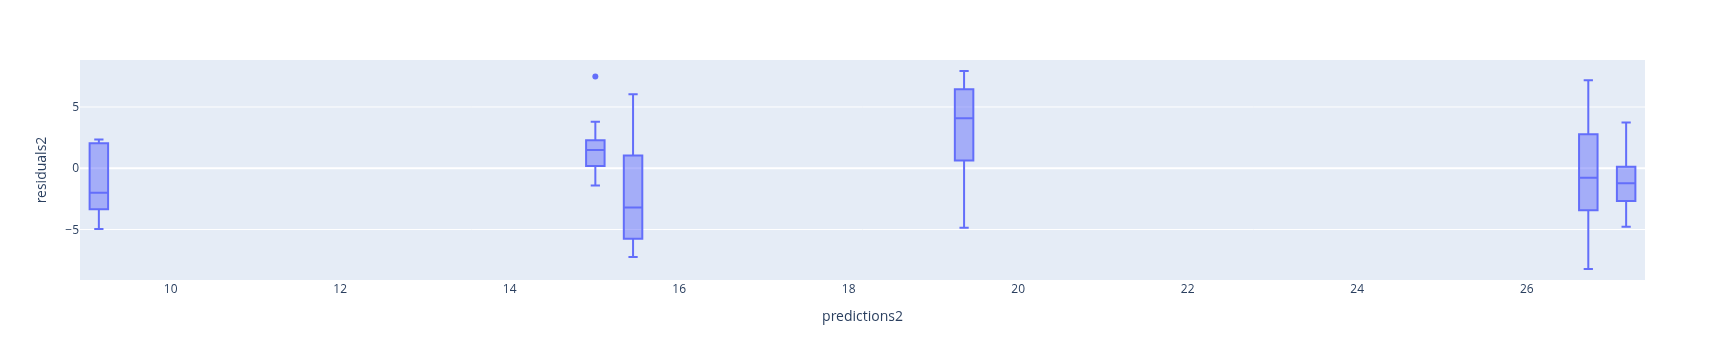

In [44]:
px.box(dataframe,x="predictions2",y="residuals2")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">box</field><data>px:box</data><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="predictions2"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="residuals2"</field></block></value></block></xml>

**QUESTION:**

Do we have linearity and equal variance? Why?

**ANSWER: (click here to edit)**

*Equal variance seems to be a bit worse in this model because of the two small boxes. 
The rest of the boxes have about the same size but uneven whiskers.
Linearity does not seem improved; there is still a bit of a hump in the data.*

<hr>

With this new model, calculate $r^2$ :

In [46]:
lm.score(dataframe[['supp_VC', 'dose', 'ds']],dataframe[['len']])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">score</field><data>lm:score</data><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="o5szXy4*HmKGA;-.~H?H"><mutation items="3"></mutation><value name="ADD0"><block type="text" id="^8=3t%ElxVkV`ccPZa6L"><field name="TEXT">supp_VC</field></block></value><value name="ADD1"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">dose</field></block></value><value name="ADD2"><block type="text" id="a@4k~6jqr$XYOxb/QSzi"><field name="TEXT">ds</field></block></value></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="[WAkSKWMcU+j3zS)uzVG"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">len</field></block></value></block></value></block></value></block></xml>

0.7295543698475715

**QUESTION:**

How does this $r^2$  compare to the model without the interaction?

**ANSWER: (click here to edit)**

*It's about .08 higher*

<hr>

<!--  -->